# Linear model: AnAge

We will analyze animal life-history data from [AnAge](http://genomics.senescence.info/download.html#anage). 
Specifically, we will try to find to examine [Kleiber's law](https://en.wikipedia.org/wiki/Kleiber%27s_law) which suggests that the metabolic rate of animals is proportional to their body mass raised to power 3/4, that is:
$$
W \sim m^{3/4}
$$
where $W$ is metabolic rate and $m$ is body mass.

The data is in the file `../data/anage_data.txt`.

First, remove rows in which the body mass is `NaN`.
Second, plot the linear regression line for the entire dataset (you can use [`sns.lmplot`](http://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot)).
Third, calculate a separate linear regression for each value of the `Class` column. Try to use [`df.groupby`](http://pandas.pydata.org/pandas-docs/stable/groupby.html) and iterate over the resulting data grouped dataframe.
Fourth, plot a separate scatterplot and linear regression plot for each classes (you can use [`sns.lmplot`](http://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot)).

In [10]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import scipy


In [ ]:
df = pd.read_csv("../data/anage_data.txt", sep="\t")
#df.head(10)
df.columns

Index(['HAGRID', 'Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus',
       'Species', 'Common name', 'Female maturity (days)',
       'Male maturity (days)', 'Gestation/Incubation (days)', 'Weaning (days)',
       'Litter/Clutch size', 'Litters/Clutches per year',
       'Inter-litter/Interbirth interval', 'Birth weight (g)',
       'Weaning weight (g)', 'Adult weight (g)', 'Growth rate (1/days)',
       'Maximum longevity (yrs)', 'Source', 'Specimen origin', 'Sample size',
       'Data quality', 'IMR (per yr)', 'MRDT (yrs)', 'Metabolic rate (W)',
       'Body mass (g)', 'Temperature (K)', 'References'],
      dtype='object')

In [6]:
# Drop NaN
df = df.dropna(subset=["Body mass (g)"])
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HAGRID,627.0,1841.170654,844.223942,18.000000,993.5000,2089.0000,2538.000,3403.00
Female maturity (days),511.0,484.745597,543.100845,24.000000,213.0000,365.0000,547.500,4745.00
Male maturity (days),421.0,537.916865,573.947874,36.000000,300.0000,365.0000,669.000,5110.00
Gestation/Incubation (days),510.0,61.049020,70.981718,2.000000,20.0000,30.0000,74.500,644.00
Weaning (days),339.0,82.598820,92.282391,13.000000,28.0000,50.0000,95.000,639.00
Litter/Clutch size,554.0,53.274946,549.318166,1.000000,2.0000,3.0000,5.000,10000.00
Litters/Clutches per year,432.0,1.829051,1.269577,0.200000,1.0000,1.5000,2.000,10.00
Inter-litter/Interbirth interval,254.0,246.842520,193.800779,20.000000,60.0000,242.0000,365.000,1187.00
Birth weight (g),437.0,907.957196,6201.037160,0.004000,2.1000,7.5000,48.200,107000.00
Weaning weight (g),220.0,3530.813886,19474.182159,2.065000,15.1200,78.0500,500.000,253484.00


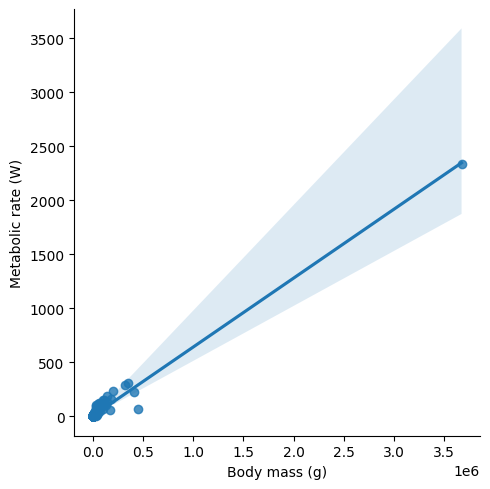

In [7]:
# lmplot
sns.lmplot(data=df, x='Body mass (g)', y='Metabolic rate (W)')

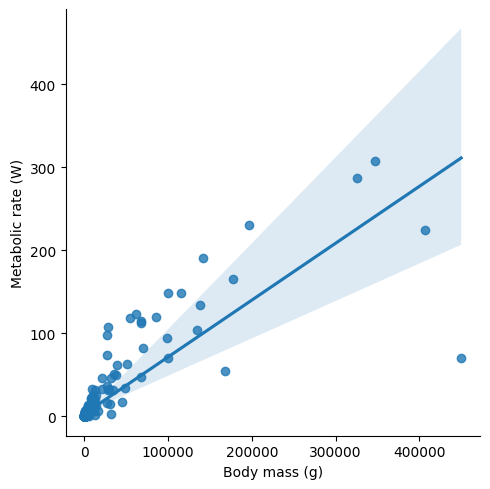

In [ ]:
# removing outliers.
rmv_outlier_df = df[df["Body mass (g)"] < 1.0e6]
sns.lmplot(data=rmv_outlier_df, x='Body mass (g)', y='Metabolic rate (W)')

In [18]:
df["Body mass ^ 3/4"] = df["Body mass (g)"]**(3/4)
df.head(10)

,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,Female maturity (days),...,Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K),References,Body mass ^ 3/4
11,18,Animalia,Chordata,Amphibia,Anura,Bufonidae,Anaxyrus,americanus,American toad,910.0,...,captivity,medium,acceptable,NaN,NaN,0.00829,21.60,288.00,"37,268,426,525,749",10.019368
19,26,Animalia,Chordata,Amphibia,Anura,Bufonidae,Anaxyrus,terrestris,Southern toad,NaN,...,captivity,medium,acceptable,NaN,NaN,0.00698,19.20,288.00,"37,451,749",9.172251
29,36,Animalia,Chordata,Amphibia,Anura,Bufonidae,Rhinella,marina,Cane toad,365.0,...,captivity,large,acceptable,NaN,NaN,0.03030,105.00,293.00,"37,296,485,749",32.801369
53,60,Animalia,Chordata,Amphibia,Anura,Hylidae,Hyla,versicolor,Gray treefrog,730.0,...,captivity,medium,acceptable,NaN,NaN,0.00433,6.97,290.50,"37,528,543,749",4.289677
60,67,Animalia,Chordata,Amphibia,Anura,Hylidae,Pseudacris,crucifer,Spring peeper,912.0,...,unknown,small,low,NaN,NaN,0.00105,0.90,292.00,"37,451,525,528,749",0.924021
78,85,Animalia,Chordata,Amphibia,Anura,Pipidae,Xenopus,laevis,African clawed frog,183.0,...,captivity,large,acceptable,NaN,NaN,0.01200,63.60,288.00,"10,37,196,451,526,607,749,1255",22.521268
81,88,Animalia,Chordata,Amphibia,Anura,Ranidae,Lithobates,catesbeianus,American bullfrog,1277.0,...,captivity,medium,acceptable,NaN,NaN,0.01340,51.20,288.00,"2,37,485,526,528,749",19.140464
83,90,Animalia,Chordata,Amphibia,Anura,Ranidae,Lithobates,pipiens,Northern leopard frog,730.0,...,wild,medium,acceptable,NaN,NaN,0.00576,21.60,289.78,"37,42,268,525,528,749",10.019368
85,92,Animalia,Chordata,Amphibia,Anura,Ranidae,Lithobates,sylvaticus,Wood frog,912.0,...,unknown,medium,questionable,NaN,NaN,0.00416,7.80,289.80,"37,43,289,340,528,749",4.667356
104,111,Animalia,Chordata,Amphibia,Caudata,Ambystomatidae,Ambystoma,maculatum,Spotted salamander,1095.0,...,unknown,medium,acceptable,NaN,NaN,0.00500,12.80,290.00,"37,528,749",6.767176


In [23]:
# groupby separate lin regres
for classs, grp in df.groupby("Class"):
    # print(classs, grp)
    # print("-----")
    lin_rg = scipy.stats.linregress(grp["Body mass ^ 3/4"], grp["Metabolic rate (W)"])
    print(f"classs: {classs}, y-{lin_rg.slope:2.3f}*x + {lin_rg.intercept:2.3f} , r2 = {lin_rg.rvalue**2:2.2f}")

classs: Amphibia, y-0.000*x + 0.004 , r2 = 0.57
classs: Aves, y-0.013*x + 0.656 , r2 = 0.95
classs: Mammalia, y-0.026*x + -4.568 , r2 = 0.95
classs: Reptilia, y-0.001*x + -0.021 , r2 = 0.99


### Why do we square $r$ to get $R^2$?

The correlation coefficient rrr can be negative or positive, depending on the direction of the relationship.
However, when we measure how much variance in Y is explained by X, we need a non-negative measure.
Squaring rrr gives us $R^2$, which represents the proportion of variance explained by the model:
$R^2 = r^2$.   

Example:   
- If $r=0.8$, then $R^2 = 0.64 → 64\%$ of the variance in Y is explained by X.
- If $r=−0.8$, then $R^2 = 0.64 → 64\%$, because strength matters, not direction.

### Positive vs Negative Linear Relationship
- As X increases, Y also increases.   
  Example: Height vs Weight (generally taller people weigh more). $r>0$.

- Negative Linear Relationship:  
  As X increases, Y decreases.   
  Example: Speed vs Travel Time (higher speed → less time). $r<0$.   

So the sign of r tells you the direction of the relationship:   
Positive → upward slope.   
Negative → downward slope.   

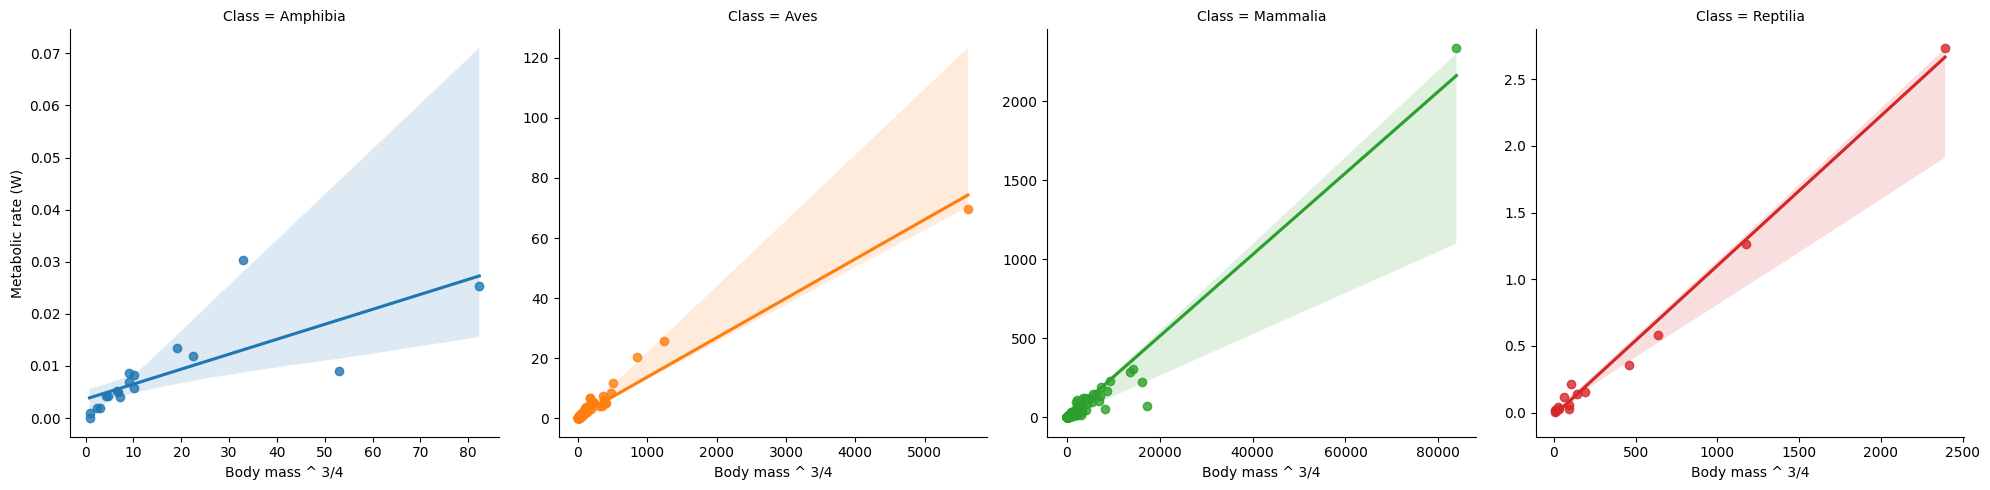

In [21]:
# Fourth: Separate lmplots by Classes
sns.lmplot(data=df, x='Body mass ^ 3/4', y='Metabolic rate (W)', hue='Class', col='Class', facet_kws=dict(sharex=False, sharey=False))

In [ ]:
# MCB SelfTry#1
BASE = Path("/Users/manashchakraborty/MCbLocal/mcbGIT/mcbdotme72repos/mcb-RAW/Learnings/KLA-IntroToDeepLearning/DataSciPy-kla2025/")


# Load dataset
data_path = str(BASE / "data" / "anage_data.txt")
print("Data path:", data_path)
data = pd.read_csv(data_path, sep="\t")

# [1] Drop any rows with NaN Bodymass.
# print(data.columns)
drp_col_1 = 'Body mass ^ 3/4'
drp_col_2 = 'IMR (per yr)'
drp_col_3 = 'MRDT (yrs)'

data = data.dropna(subset=[drp_col_1])
data["Body mass ^ 3/4"] = data["Body mass (g)"]**(3/4)
data.head(10)

# [2] Linear Regression of Bodymass vs Metabolic Rate:
fig_1 = plt.figure(figsize=(8, 6))
x_col = 'Body mass ^ 3/4'
y_col = 'Metabolic rate (W)'
sns.lmplot(data=data, x=x_col, y=y_col)
plt.xlabel("Body Mass (g)")
plt.ylabel("Metabolic Rate (W)")
plt.title("Linear Regression: Body Mass vs Metabolic Rate")
plt.show()

# [3] Linear Regression: Separate for each 'Class' of animal
fig_2 = plt.figure(figsize=(8, 6))
x_col = 'Body mass ^ 3/4'
y_col = 'Metabolic rate (W)'
hue_col = 'Class'
sns.lmplot(data=data, x=x_col, y=y_col, hue=hue_col, col=hue_col, facet_kws=dict(sharex=False, sharey=False))
plt.xlabel("Body Mass ^ 3/4")
plt.ylabel("Metabolic Rate (W)")
plt.title("Linear Regression: Body Mass vs Metabolic Rate")
plt.show()



In [25]:
data.columns

Index(['HAGRID', 'Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus',
       'Species', 'Common name', 'Female maturity (days)',
       'Male maturity (days)', 'Gestation/Incubation (days)', 'Weaning (days)',
       'Litter/Clutch size', 'Litters/Clutches per year',
       'Inter-litter/Interbirth interval', 'Birth weight (g)',
       'Weaning weight (g)', 'Adult weight (g)', 'Growth rate (1/days)',
       'Maximum longevity (yrs)', 'Source', 'Specimen origin', 'Sample size',
       'Data quality', 'IMR (per yr)', 'MRDT (yrs)', 'Metabolic rate (W)',
       'Body mass (g)', 'Temperature (K)', 'References'],
      dtype='object')

In [27]:
data.head(10)

,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,Female maturity (days),...,Source,Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K),References
2373,2390,Animalia,Chordata,Mammalia,Primates,Cercopithecidae,Papio,hamadryas,Hamadryas baboon,1514.0,...,671,captivity,large,high,0.0600,4.0,21.095,12670.8,311.15,"9,36,59,149,150,151,152,153,154,155,156,157,15..."
2407,2424,Animalia,Chordata,Mammalia,Primates,Hominidae,Homo,sapiens,Human,4745.0,...,29,captivity,huge,high,0.0002,8.0,82.780,70000.0,310.15,"2,13,14,29,30,31,36,58,59,65,75,76,110,111,121..."
2680,2697,Animalia,Chordata,Mammalia,Rodentia,Muridae,Mus,musculus,House mouse,42.0,...,506,captivity,large,high,0.0100,0.3,0.271,18.0,310.05,"2,11,13,14,36,51,53,59,69,110,217,248,272,305,..."
